In [1]:
import os
import re
import matplotlib.pyplot as plt

In [2]:
def collect_loss(nohup_file):
    steps = []
    loss1 = []
    loss2 = []
    lrs = []
    test_accs = []
    test_losses = []
    
    p1 = re.compile('Iteration (\d+) (.*), loss = (\d.\d+)')
    p2 = re.compile('Train net output #0: loss = (\d.\d+)')
    p3 = re.compile('Iteration (\d+), lr = (\d.*)')
    
    p4 = re.compile("#0: accuracy = (\d.*)")
    p5 = re.compile("#1: loss = (\d.\d+)")
    
    with open(nohup_file, 'r') as f:
        for line in f.readlines():
               
            if "Iteration" in line and "loss" in line:
                m = p1.search(line)
                step = int(m.group(1))
                loss = float(m.group(3))
                steps.append(step)
                loss1.append(loss)
            if "Train net output" in line and "loss" in line:
                m = p2.search(line)
                loss = float(m.group(1))
                loss2.append(loss)
            if "Iteration" in line and "lr" in line:
                m = p3.search(line)
                lr = float(m.group(2))
                lrs.append(lr)
                
            if "Test net output" in line:
                if "accuracy" in line:
                    m = p4.search(line)
                    acc = float(m.group(1))
                    test_accs.append(acc)
                if "loss" in line:
                    m = p5.search(line)
                    loss = float(m.group(1))
                    test_losses.append(loss)
                    
    return steps, loss1, loss2, lrs, test_accs, test_losses            

# train steps 7706
# tests 10
accuracy [0.999093, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
loss [0.00316661, 0.000143167, 0.000111664, 0.000106418, 0.000106428, 0.000105311, 0.000104465, 0.000104589, 0.000104455, 0.00010386]


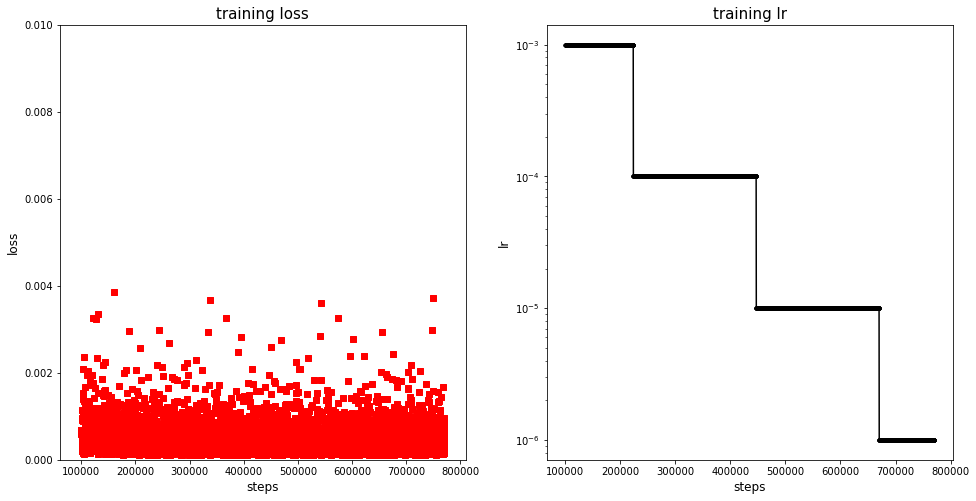

In [3]:
nohup_file = "nohup.out"
steps, loss1, loss2, lrs, test_accs, test_losses = collect_loss(nohup_file)
print("# train steps", len(steps))
print("# tests", len(test_accs))
print("accuracy", test_accs)
print("loss", test_losses)


start, end = 1000, len(steps)


f = plt.figure(figsize=(16, 8))

ax1 = f.add_subplot(1, 2, 1)
ax1.set_title("training loss", fontsize=15)
ax1.scatter(steps[start:end], loss1[start:end], marker='.', color='black')
ax1.scatter(steps[start:end], loss2[start:end], marker='s', color='red')
ax1.set_ylim(0.0, 0.01)
ax1.set_xlabel("steps", fontsize=12)
ax1.set_ylabel("loss", fontsize=12)


ax2 = f.add_subplot(1, 2, 2)
ax2.set_title("training lr", fontsize=15)
ax2.semilogy(steps[start:end], lrs[start:end], marker='.', color='black')
# ax2.set_yscale("log")
ax2.set_xlabel("steps", fontsize=12)
ax2.set_ylabel("lr", fontsize=12)

plt.show()